<a href="https://colab.research.google.com/github/sakira/TensorflowInPractice/blob/master/RockPaperScissorsCourse2_Week4.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [5]:
!wget --no-check-certificate \
  https://storage.googleapis.com/laurencemoroney-blog.appspot.com/rps.zip \
  -O /tmp/rps.zip

!wget --no-check-certificate \
  https://storage.googleapis.com/laurencemoroney-blog.appspot.com/rps-test-set.zip \
  -O /tmp/rps-test-set.zip

!wget --no-check-certificate \
  https://storage.googleapis.com/laurencemoroney-blog.appspot.com/rps-validation.zip \
  -O /tmp/rps-validation.zip

import os
import zipfile

def unzip(local_zip, location):
  zip_ref = zipfile.ZipFile(local_zip, 'r')
  zip_ref.extractall(location)
  zip_ref.close()

local_zip =  '/tmp/rps.zip'
location = '/tmp'
unzip(local_zip, location)
local_zip = '/tmp/rps-test-set.zip'
unzip(local_zip, location)
local_zip = '/tmp/rps-validation.zip'
unzip(local_zip, location+'/validation')

!ls /tmp






--2019-12-20 08:12:39--  https://storage.googleapis.com/laurencemoroney-blog.appspot.com/rps.zip
Resolving storage.googleapis.com (storage.googleapis.com)... 108.177.15.128, 2a00:1450:400c:c06::80
Connecting to storage.googleapis.com (storage.googleapis.com)|108.177.15.128|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 200682221 (191M) [application/zip]
Saving to: ‘/tmp/rps.zip’

/tmp/rps.zip        100%[===================>] 191.38M   112MB/s    in 1.7s    

2019-12-20 08:12:41 (112 MB/s) - ‘/tmp/rps.zip’ saved [200682221/200682221]

--2019-12-20 08:12:42--  https://storage.googleapis.com/laurencemoroney-blog.appspot.com/rps-test-set.zip
Resolving storage.googleapis.com (storage.googleapis.com)... 74.125.140.128, 2a00:1450:400c:c0a::80
Connecting to storage.googleapis.com (storage.googleapis.com)|74.125.140.128|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 29516758 (28M) [application/zip]
Saving to: ‘/tmp/rps-test-set.zip’

/tmp/r

In [0]:
rm -r /tmp/*.zip

In [9]:
rock_dir = os.path.join('/tmp/rps/rock')
paper_dir = os.path.join('/tmp/rps/paper')
scissors_dir = os.path.join('/tmp/rps/scissors')

print('total training rock images: {}'.format(len(os.listdir(rock_dir))))
print('total training paper images: {}'.format(len(os.listdir(paper_dir))))
print('total training scissors images: {}'.format(len(os.listdir(scissors_dir))))

rock_files = os.listdir(rock_dir)
paper_files = os.listdir(paper_dir)
scissors_files = os.listdir(scissors_dir)

total training rock images: 840
total training paper images: 840
total training scissors images: 840


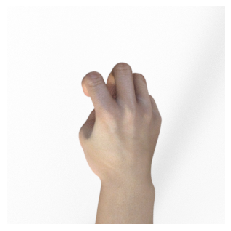

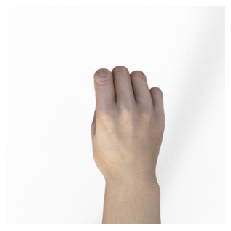

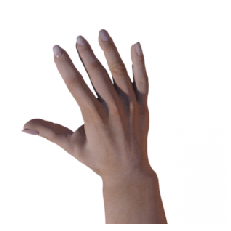

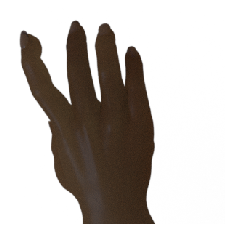

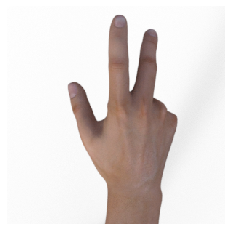

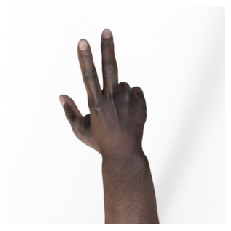

In [11]:
%matplotlib inline

import matplotlib.pyplot as plt
import matplotlib.image as mpimg

pic_index = 2

next_rock = [os.path.join(rock_dir, fname) for fname in rock_files[pic_index-2:pic_index]]
next_paper = [os.path.join(paper_dir, fname) for fname in paper_files[pic_index-2:pic_index]]
next_scissors = [os.path.join(scissors_dir, fname) for fname in scissors_files[pic_index-2:pic_index]]


for i, img_path in enumerate(next_rock + next_paper + next_scissors):
  img = mpimg.imread(img_path)
  plt.imshow(img)
  plt.axis('off')
  plt.show()

In [0]:
%tensorflow_version 1.x
import tensorflow as tf
import keras_preprocessing
from keras_preprocessing import image
from keras_preprocessing.image import ImageDataGenerator


In [21]:

train_dir = '/tmp/rps/'
train_datagen = ImageDataGenerator(
    rescale=1./255.,
    width_shift_range=0.2,
    height_shift_range=0.2,
    rotation_range=40,
    shear_range=0.2,
    zoom_range=0.2,
    horizontal_flip=True,
    fill_mode='nearest'
    
    )
train_generator = train_datagen.flow_from_directory(
    train_dir,
    target_size=(150, 150),
    batch_size=128,
    class_mode='categorical'
)


test_dir = '/tmp/rps-test-set/'
validation_datagen = ImageDataGenerator(rescale=1./255.)

validation_generator = validation_datagen.flow_from_directory(
    test_dir,
    batch_size=32,
    target_size=(150, 150),
    class_mode='categorical'
)

Found 2520 images belonging to 3 classes.
Found 372 images belonging to 3 classes.


In [24]:
model = tf.keras.models.Sequential([
    tf.keras.layers.Conv2D(64, (3,3), activation='relu', input_shape=(150, 150, 3)),
    tf.keras.layers.MaxPooling2D(2, 2),

    tf.keras.layers.Conv2D(64, (3,3), activation='relu'),
    tf.keras.layers.MaxPooling2D(2, 2),

    tf.keras.layers.Conv2D(128, (3,3), activation='relu'),
    tf.keras.layers.MaxPooling2D(2, 2),

    tf.keras.layers.Conv2D(128, (3,3), activation='relu'),
    tf.keras.layers.MaxPooling2D(2, 2),

    tf.keras.layers.Flatten(),
    tf.keras.layers.Dropout(0.5),
    tf.keras.layers.Dense(512, activation='relu'),
    tf.keras.layers.Dense(3, activation='softmax')

])
model.summary()

Model: "sequential_2"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_6 (Conv2D)            (None, 148, 148, 64)      1792      
_________________________________________________________________
max_pooling2d_6 (MaxPooling2 (None, 74, 74, 64)        0         
_________________________________________________________________
conv2d_7 (Conv2D)            (None, 72, 72, 64)        36928     
_________________________________________________________________
max_pooling2d_7 (MaxPooling2 (None, 36, 36, 64)        0         
_________________________________________________________________
conv2d_8 (Conv2D)            (None, 34, 34, 128)       73856     
_________________________________________________________________
max_pooling2d_8 (MaxPooling2 (None, 17, 17, 128)       0         
_________________________________________________________________
conv2d_9 (Conv2D)            (None, 15, 15, 128)      

In [25]:
from tensorflow.keras.optimizers import RMSprop

model.compile(loss='categorical_crossentropy',
              optimizer=RMSprop(lr=0.001),
              metrics=['acc'])

history = model.fit_generator(
    train_generator,
    #steps_per_epoch=100,
    epochs=25,
    verbose=1,
    validation_data=validation_generator
    #validation_steps=50
)

model.save('rps.h5')

Epoch 1/25
20/20 [==============================] - 25s 1s/step - loss: 1.2354 - acc: 0.3321 - val_loss: 1.0737 - val_acc: 0.3333
Epoch 2/25
20/20 [==============================] - 23s 1s/step - loss: 1.1189 - acc: 0.3730 - val_loss: 1.0895 - val_acc: 0.3333
Epoch 3/25
20/20 [==============================] - 23s 1s/step - loss: 1.0476 - acc: 0.4556 - val_loss: 0.9032 - val_acc: 0.6075
Epoch 4/25
20/20 [==============================] - 24s 1s/step - loss: 0.9623 - acc: 0.5266 - val_loss: 0.6987 - val_acc: 0.8038
Epoch 5/25
20/20 [==============================] - 24s 1s/step - loss: 0.8370 - acc: 0.6306 - val_loss: 0.4087 - val_acc: 0.7312
Epoch 6/25
20/20 [==============================] - 24s 1s/step - loss: 0.6540 - acc: 0.7206 - val_loss: 0.2748 - val_acc: 0.9570
Epoch 7/25
20/20 [==============================] - 24s 1s/step - loss: 0.6464 - acc: 0.7159 - val_loss: 0.2221 - val_acc: 0.9677
Epoch 8/25
20/20 [==============================] - 24s 1s/step - loss: 0.4438 - acc: 0.81

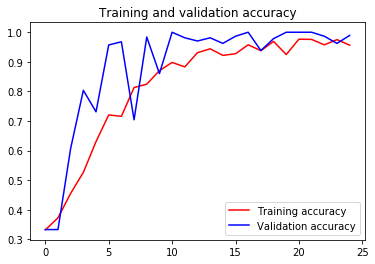

In [26]:
import matplotlib.pyplot as plt
acc = history.history['acc']
val_acc = history.history['val_acc']
loss = history.history['loss']
val_loss = history.history['val_loss']

epochs = range(len(acc))

plt.figure()
plt.plot(epochs, acc, 'r', label='Training accuracy')
plt.plot(epochs, val_acc, 'b', label='Validation accuracy')
plt.title('Training and validation accuracy')
plt.legend()

plt.show()



In [28]:
import numpy as np

from google.colab import files
from keras.preprocessing import image

uploaded = files.upload()

for fn in uploaded.keys():
  path = fn
  img = image.load_img(path, target_size=(150, 150))
  x = image.img_to_array(img)
  x = np.expand_dims(x, axis=0)

  images = np.vstack([x])
  classes = model.predict(images, batch_size=10)
  print(fn)
  print(classes)

Saving paper1.png to paper1.png
Saving paper2.png to paper2.png
Saving paper3.png to paper3.png
Saving paper4.png to paper4.png
Saving paper5.png to paper5.png
Saving paper6.png to paper6.png
Saving paper7.png to paper7.png
Saving paper8.png to paper8.png
Saving paper9.png to paper9.png
Saving paper-hires1.png to paper-hires1.png
Saving paper-hires2.png to paper-hires2.png
Saving rock1.png to rock1.png
Saving rock2.png to rock2.png
Saving rock3.png to rock3.png
Saving rock4.png to rock4.png
Saving rock5.png to rock5.png
Saving rock6.png to rock6.png
Saving rock7.png to rock7.png
Saving rock8.png to rock8.png
Saving rock9.png to rock9.png
Saving rock-hires1.png to rock-hires1.png
Saving rock-hires2.png to rock-hires2.png
Saving scissors1.png to scissors1.png
Saving scissors2.png to scissors2.png
Saving scissors3.png to scissors3.png
Saving scissors4.png to scissors4.png
Saving scissors5.png to scissors5.png
Saving scissors6.png to scissors6.png
Saving scissors7.png to scissors7.png
Savi